**Monte Carlo example (1)**
\
\
Calculate $\pi$

In [ ]:
N= 10000000
count= 0

for i = 1:N
    (x,y) = (rand()*2 - 1, rand()*2 - 1) #random (x-1), (y-1)
    if x^2+y^2 < 1
        count+=1
    end
end

print(4*count/N)

3.1413048

**Monte Carlo example (2)**
\
\
$\int_{0}^{1} x^r dx$ $(x^r = \frac{1}{r+1})$

In [ ]:
N = 10^7
r = 5.26
exactValue = 1 / (1+r)
sum = 0

for i = 1:N
    sum += rand() ^ r
end

println("excat Value : ", exactValue)
print("monteCarlo Value : ", sum/N)

**Degree is better than Radian! (Floating Point)**

In [16]:
radian = [sin(2*π*1/4), sin(2*π*2/4), sin(2*π*3/4), sin(2*π*4/4)]
degree = [sind(360*1/4), sind(360*2/4), sind(360*3/4),sind(360*4/4)]

println("radian $radian")
println("degree $degree")

radian [1.0, 1.2246467991473532e-16, -1.0, -2.4492935982947064e-16]
degree [1.0, 0.0, -1.0, 0.0]


**TCI Value - Function Value**

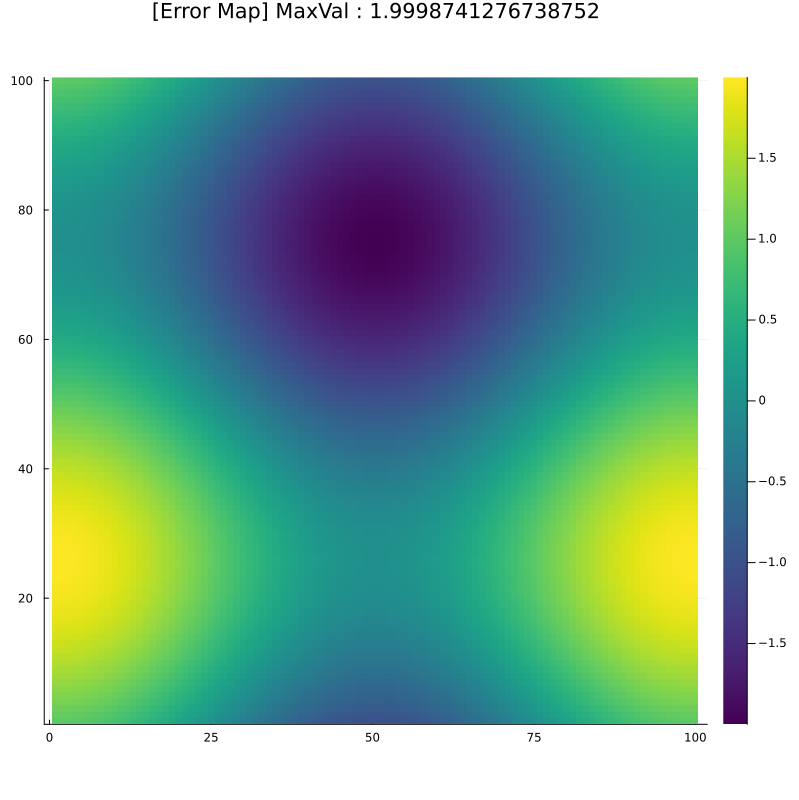

In [ ]:
# pkg import
import TensorCrossInterpolation as TCI
using Plots

#Exact Case
N::Int = 100

function f(v)
    j = v[1]
    k = v[2]
    return sind(360/(N-1)*(j-1)) + cosd(360/(N-1)*(k-1))
end


localdims = fill(N, 2) 
tolerance = 1e-8 
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)

errMap = Array{Float64}(undef, N, N)


for x = 1:N
    for y = 1:N 
        errMap[x,y] = abs(f([x,y]) - tci([x,y]))
    end
end 

maxVal = maximum(errMap)
vis = heatmap(errMap, title="[Error Map] MaxVal : $maxVal", aspect_ratio=:equal, color=:viridis)
plot(vis,size=(800, 800))



**Tensor Slicing (Partially independent of the TCI library)** 

<img src="Image\TCI.jpg" alt="rank2" width=800>

In [ ]:
# pkg import
import TensorCrossInterpolation as TCI

#Exact Case
N::Int = 100

#e^(i*2pi*(jk/N)) ??
function f(v)
    j = v[1]
    k = v[2]
    l = v[3]
    term1 = cos(2*π*(j*k/N)) * sin(2*π*(j*l/N))* exp(-j/N)
    term2 = sin(2*π*(j*k/N)) * cos(2*π*(j*l/N))* exp(-j^2/N^2)
    return term1 + term2
end

localdims = fill(N, 3) # N lattices for 3 variable
tolerance = 1e-8 #target error
tci, ranks, errors = TCI.crossinterpolate2(Float64, f, localdims; tolerance=tolerance)

println(tci)

mps = tci.sitetensors

#set initial tensor (size 1 1)
mpsVal = fill(1.0, 1, 1) #[1.0;;] is also possible
idx = [1,2,59]

for (x, tensor) in enumerate(mps)
    println("tensor $x :", size(tensor))
    slice = tensor[:, idx[x], :]
    global mpsVal = mpsVal * slice
end

println("By tensor slicing : ", mpsVal[1])
println("By tci library : ", tci(idx))
println("By function : ", f(idx))

TensorCrossInterpolation.TensorCI2{Float64} with rank 98
tensor 1 :(1, 100, 49)
tensor 2 :(49, 100, 98)
tensor 3 :(98, 100, 1)
By tensor slicing : -0.6321238833391244
By tci library : -0.6321238833391244
By function : -0.6321238833391235


**Using Gauss - Kronrod Quadrature in Julia** \
https://github.com/JuliaMath/QuadGK.jl.git

In [ ]:
using QuadGK
r = 5.26
exactValue = 1 / (1+r)
integral, err = quadgk(x -> x^r, 0, 1, rtol=1e-8)

println("excat Value : ", exactValue)
println("GKquad : ", integral)

excat Value : 0.1597444089456869
GKquad : 0.15974440894570846
